In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [2]:
file = "/Users/kadir/jupyter-notebook/DeveloperMetrics/data/All_Developer_Metrics_selected.csv"
df = pd.read_csv(file, low_memory=False)
pd.set_option('display.max_columns', None)
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.set_option('display.max_rows', None)
df.head()

,repo_id,user_id,num_commit_committed,num_commit_authored,num_commit_commented,num_issue_opened,num_issue_closed,num_issue_assigned,num_issue_commented,num_issue_closedwithPR,num_pr_opened,num_pr_merged,num_pr_assigned,num_pr_commented,O_num_commit_committed,O_num_commit_authored,O_num_commit_commented,O_num_issue_opened,O_num_issue_closed,O_num_issue_assigned,O_num_issue_closedPR,O_num_issue_commented,O_num_pr_opened,O_num_pr_assigned,O_num_pr_merged,O_num_pr_commented,code_contributions,comments,commit_2_comment,issue_2_comment,pr_2_comment,code_2_comment,comment_2_code,issue_related,pr_related,commit_related,binary_code_contributions,binary_comments,binary_issue_related,binary_pr_related,binary_commit_related
0,1,21,NaN,NaN,NaN,2.0,NaN,NaN,17.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.010695,NaN,NaN,0.053476,0.034623,0.009804,NaN,NaN,NaN,4.0,17.0,NaN,0.117647,NaN,NaN,NaN,20.0,1.0,0.0,3.0,1.0,3.0,1.0,0.0
1,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,173,NaN,NaN,NaN,2.0,NaN,NaN,136.0,2.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,0.010695,NaN,NaN,0.106952,0.276986,0.019608,NaN,0.098039,0.05,7.0,137.0,NaN,0.014706,2.0,2.014706,0.49635,140.0,4.0,0.0,4.0,2.0,3.0,3.0,0.0


In [4]:
#DENEME
df['open_closed_issue']= df['num_issue_opened']   / df['num_issue_closed']
df.head()

,repo_id,user_id,num_commit_committed,num_commit_authored,num_commit_commented,num_issue_opened,num_issue_closed,num_issue_assigned,num_issue_commented,num_issue_closedwithPR,num_pr_opened,num_pr_merged,num_pr_assigned,num_pr_commented,O_num_commit_committed,O_num_commit_authored,O_num_commit_commented,O_num_issue_opened,O_num_issue_closed,O_num_issue_assigned,O_num_issue_closedPR,O_num_issue_commented,O_num_pr_opened,O_num_pr_assigned,O_num_pr_merged,O_num_pr_commented,code_contributions,comments,commit_2_comment,issue_2_comment,pr_2_comment,code_2_comment,comment_2_code,issue_related,pr_related,commit_related,binary_code_contributions,binary_comments,binary_issue_related,binary_pr_related,binary_commit_related,open_closed_issue
0,1,21,NaN,NaN,NaN,2.0,NaN,NaN,17.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.010695,NaN,NaN,0.053476,0.034623,0.009804,NaN,NaN,NaN,4.0,17.0,NaN,0.117647,NaN,NaN,NaN,20.0,1.0,0.0,3.0,1.0,3.0,1.0,0.0,NaN
1,1,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1,173,NaN,NaN,NaN,2.0,NaN,NaN,136.0,2.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,0.010695,NaN,NaN,0.106952,0.276986,0.019608,NaN,0.098039,0.05,7.0,137.0,NaN,0.014706,2.0,2.014706,0.49635,140.0,4.0,0.0,4.0,2.0,3.0,3.0,0.0,NaN


In [5]:
repos = pd.read_csv('/Users/kadir/github-data/Repos.csv',sep=',')
repos['language'] = repos['language'].astype(str)
repos['language'] = repos['language'].str.lower()
repos['language'].replace('nan','x',inplace=True)
repo_full_names = repos[['repo_id', 'full_name']].copy()
toplanguages = pd.read_csv('/Users/kadir/github-data/topLanguages.csv',sep=',')

In [6]:
header = 'ALL_developer_metrics'

topn= [1,3,5,10,20]
for n in topn:
    topn = n
    topn_hit = []
    names = []
    for i in range(2,41): 
        name = df.columns[i]
        x = df.loc[:,['repo_id','user_id']]
        y = df.iloc[:, [i]]
        ratings = pd.concat([x, y], axis=1, sort=False)
        ratings.rename(columns={name:'rating'}, inplace=True)  
        ratings.replace(0,np.NaN,inplace=True)
        df2 = pd.merge(ratings, repo_full_names, on='repo_id')
        repo_matrix = df2.pivot_table(index='full_name', columns='user_id', values='rating')
        repo_matrix.replace(np.nan, 0, inplace=True)
        repo_similarity_matrix = cosine_similarity(repo_matrix)
        repo_matrix2 = repo_matrix.mask(repo_matrix==0, repo_similarity_matrix@repo_matrix.values)
        accuracy = 0
        for id in repo_matrix.columns:
            x = repo_matrix[[id]][repo_matrix[[id]].values == 0].index
            recommends = repo_matrix2[[id]].loc[x].sort_values(by=[id], ascending = 0)
            topn_recom = recommends.head(topn)
            toplangs = toplanguages[toplanguages.user_id == id].top_lang_all.values[0]
            hit = 0
            for n in topn_recom.index:
                repoLanguage = repos[repos.full_name == n].language.item()
                if repoLanguage in toplangs:
                    hit = hit +1  
            accuracy += hit * 100 / topn
                
        total_accuracy = accuracy / 100
        topn_hit.append(total_accuracy)
        names.append(name)
        display(name + ':'+ str(total_accuracy))
        
    topn_hit = np.round(topn_hit, 2)
    hit_text = "hit_top_"+str(topn)
    results  = pd.DataFrame({hit_text:topn_hit,'metric':names})
    filename = r'/Users/kadir/Desktop/language_itemBased__scores_'+header+'_'+hit_text+'.csv'
    export_csv = results.to_csv (filename,index=False, header=True)

'open_closed_issue:65.0'

'open_closed_issue:58.666666666666686'

'open_closed_issue:53.8'

'open_closed_issue:51.4'

'open_closed_issue:39.8'

In [ ]:
def highlight_max(data, color='yellow'):

    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [ ]:
file = "/Users/kadir/jupyter-notebook/DeveloperMetrics/data/ownedLanguageBased_scores_ALL_developer_metrics_hit_top_1.csv"
dftop1 = pd.read_csv(file)
dftop1.sort_values(by=['hit_top_1'], ascending = 0, inplace=True)

file = "/Users/kadir/jupyter-notebook/DeveloperMetrics/data/ownedLanguageBased_scores_ALL_developer_metrics_hit_top_3.csv"
dftop3 = pd.read_csv(file)
dftop3.sort_values(by=['hit_top_3'], ascending = 0, inplace=True)

file = "/Users/kadir/jupyter-notebook/DeveloperMetrics/data/ownedLanguageBased_scores_ALL_developer_metrics_hit_top_5.csv"
dftop5 = pd.read_csv(file)
dftop5.sort_values(by=['hit_top_5'], ascending = 0, inplace=True)

file = "/Users/kadir/jupyter-notebook/DeveloperMetrics/data/ownedLanguageBased_scores_ALL_developer_metrics_hit_top_10.csv"
dftop10 = pd.read_csv(file)
dftop10.sort_values(by=['hit_top_10'], ascending = 0, inplace=True)

file = "/Users/kadir/jupyter-notebook/DeveloperMetrics/data/ownedLanguageBased_scores_ALL_developer_metrics_hit_top_20.csv"
dftop20 = pd.read_csv(file)
dftop20.sort_values(by=['hit_top_20'], ascending = 0, inplace=True)

result = pd.merge(dftop1, dftop3, how="left", on="metric")
result = pd.merge(result, dftop5, how="left", on="metric")
result = pd.merge(result, dftop10, how="left", on="metric")
result = pd.merge(result, dftop20, how="left", on="metric")

# WE ADD THIS SCORES MANUALLY.... '!!!!!!'

#add to sun's papers metric scores. (from features_of_ref10)
#new_row = {'metric':'Sun\'s metric', 
#           'hit_top_1':8.00, 'hit_top_3':6.60, 'hit_top_5':7.10, 'hit_top_10':7.35, 'hit_top_20':6.5}
#result = result.append(new_row, ignore_index=True)

#add mean of topk scores to each metric
result['mean'] = result.mean(axis=1)
result.set_index('metric', inplace=True)
result.style.apply(highlight_max)

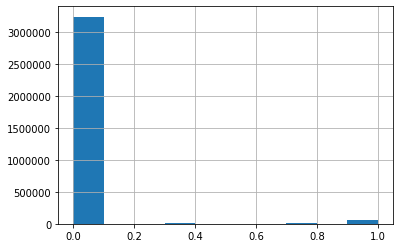

In [9]:
dfaa = pd.DataFrame(data=repo_similarity_matrix ,columns =repo_matrix.index, index=repo_matrix.index)
dfaa = dfaa.where(np.triu(np.ones(dfaa.shape)).astype(np.bool))
dfaa = dfaa.stack().reset_index(drop=True)
dfaa.hist()

In [ ]:
dfaax.sort_values('score', inplace=True)
dfaax.plot(y='score', kind='line', legend=False)